In [27]:
import pandas as pd
import numpy as np

# Define file paths
patient_file_path = "C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_patient.csv"
lookup_tables_path = "C:/Users/wardo/Documents/Internship/cancer_download/Documents/all_z_lookup_tables.xlsx"

# Load datasets
patient_df = pd.read_csv(patient_file_path, low_memory=False)
lookup_tables = pd.read_excel(lookup_tables_path, sheet_name=None)  # Load all sheets

# Standardizing gender values
gender_mapping = {1: 'Male', 2: 'Female', 9: 'Unknown'}
if 'GENDER' in patient_df.columns:
    patient_df['GENDER'] = patient_df['GENDER'].map(gender_mapping).fillna('Other')
    gender_distribution = patient_df['GENDER'].value_counts()
else:
    gender_distribution = "Gender column not found"

# Mapping ethnicity codes to names (if lookup table exists)
if 'ethnicity_lookup' in lookup_tables:
    ethnicity_lookup = lookup_tables['ethnicity_lookup']
    if 'code' in ethnicity_lookup.columns and 'name' in ethnicity_lookup.columns:
        ethnicity_dict = dict(zip(ethnicity_lookup['code'], ethnicity_lookup['name']))
        patient_df['ETHNICITY'] = patient_df['ETHNICITY'].map(ethnicity_dict).fillna('Unknown')

ethnicity_distribution = patient_df['ETHNICITY'].value_counts() if 'ETHNICITY' in patient_df.columns else "Ethnicity column not found"

# Summarizing categorical variables
categorical_summary = patient_df.select_dtypes(include=['object']).nunique()

# Checking death cause codes for anomalies
death_cause_cols = ['DEATHCAUSECODE_1A', 'DEATHCAUSECODE_1B', 'DEATHCAUSECODE_1C', 'DEATHCAUSECODE_2', 'DEATHCAUSECODE_UNDERLYING']
for col in death_cause_cols:
    if col in patient_df.columns:
        patient_df[col] = patient_df[col].apply(lambda x: x if isinstance(x, str) and len(x) > 2 else np.nan)

# Summarized demographics insights (without AGE and Tumor dataset)
demographics_summary_text = {
    "Categorical Variables Summary": categorical_summary.to_dict(),
    "Gender Distribution": gender_distribution.to_dict() if isinstance(gender_distribution, pd.Series) else gender_distribution,
    "Ethnicity Distribution": ethnicity_distribution.to_dict() if isinstance(ethnicity_distribution, pd.Series) else ethnicity_distribution,
}

# Return summarized demographics insights
demographics_summary_text


{'Categorical Variables Summary': {'GENDER': 3,
  'ETHNICITY': 23,
  'DEATHCAUSECODE_1A': 11012,
  'DEATHCAUSECODE_1B': 9265,
  'DEATHCAUSECODE_1C': 2190,
  'DEATHCAUSECODE_2': 46874,
  'DEATHCAUSECODE_UNDERLYING': 2476,
  'DEATHLOCATIONCODE': 6,
  'VITALSTATUS': 9,
  'VITALSTATUSDATE': 2527},
 'Gender Distribution': {'Female': 942065, 'Male': 929538, 'Unknown': 2},
 'Ethnicity Distribution': {'A': 1525829,
  'Z': 67078,
  'C': 61672,
  'S': 20734,
  'B': 16038,
  'H': 15225,
  'X': 14812,
  'M': 12075,
  'N': 9680,
  'J': 9357,
  'L': 8989,
  'P': 5199,
  'R': 3787,
  'G': 3338,
  'K': 2849,
  'D': 1907,
  'F': 1410,
  'E': 953,
  '0': 172,
  '8': 3,
  'CA': 2,
  'CP': 1,
  'CH': 1}}

C:\Users\wardo\AppData\Local\Temp\ipykernel_14528\3274189180.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=patient_df['GENDER'], order=patient_df['GENDER'].value_counts().index, palette="Blues_r")


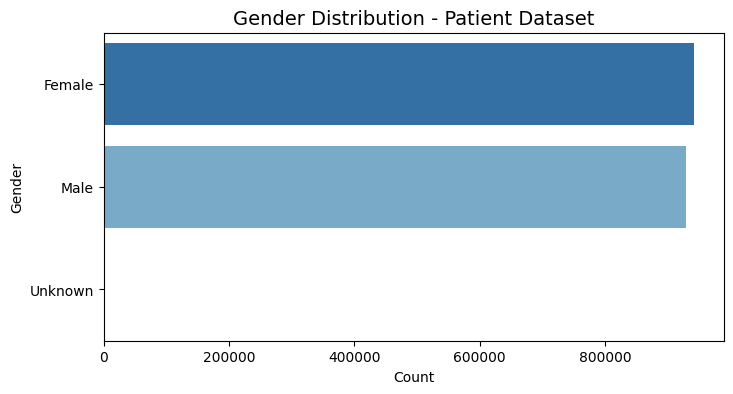

C:\Users\wardo\AppData\Local\Temp\ipykernel_14528\3274189180.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=patient_df['ETHNICITY'], order=patient_df['ETHNICITY'].value_counts().index[:10], palette="Purples_r")


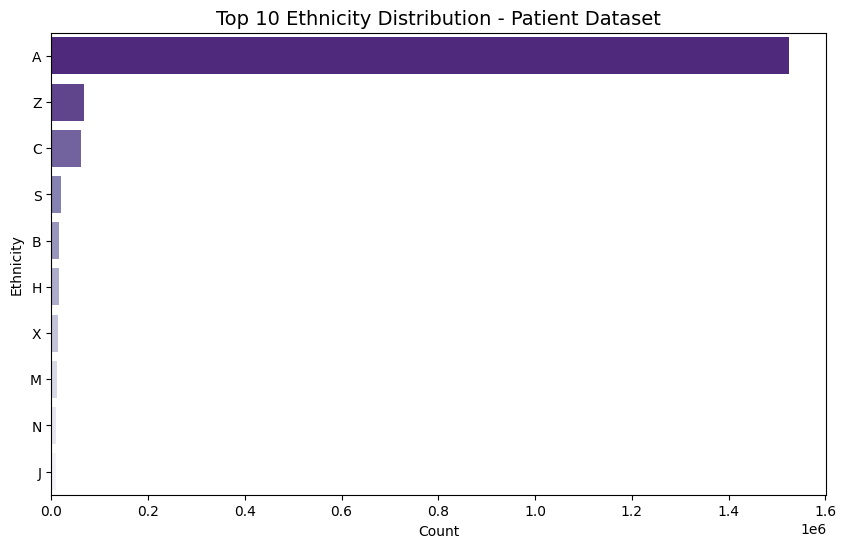

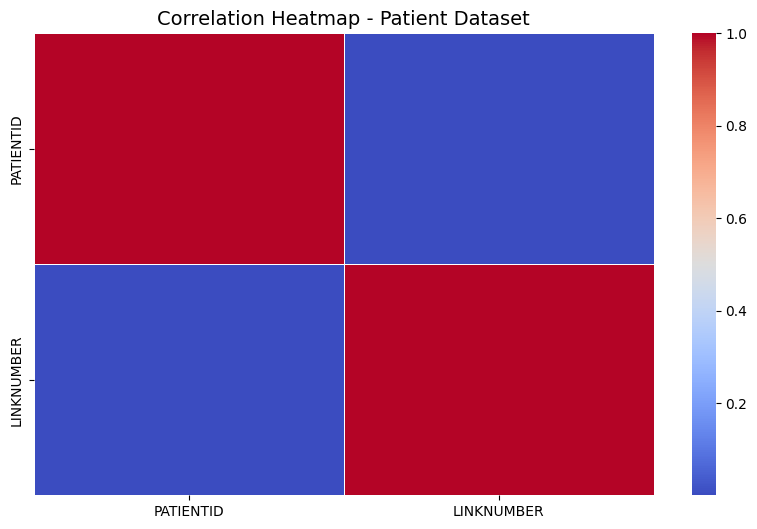

'Correlation heatmap displayed.'

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Gender Distribution ---
plt.figure(figsize=(8, 4))
sns.countplot(y=patient_df['GENDER'], order=patient_df['GENDER'].value_counts().index, palette="Blues_r")
plt.title("Gender Distribution - Patient Dataset", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Gender")
plt.show()

# --- 2. Ethnicity Distribution ---
plt.figure(figsize=(10, 6))
sns.countplot(y=patient_df['ETHNICITY'], order=patient_df['ETHNICITY'].value_counts().index[:10], palette="Purples_r")
plt.title("Top 10 Ethnicity Distribution - Patient Dataset", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Ethnicity")
plt.show()

# --- 3. Correlation Analysis (Numerical Features) ---
numeric_cols_patient = patient_df.select_dtypes(include=[np.number]).columns.tolist()

if numeric_cols_patient:
    plt.figure(figsize=(10, 6))
    corr_matrix = patient_df[numeric_cols_patient].corr()
    sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap - Patient Dataset", fontsize=14)
    plt.show()
else:
    correlation_message = "No numerical columns available for correlation analysis."

# Return correlation message if applicable
correlation_message if not numeric_cols_patient else "Correlation heatmap displayed."


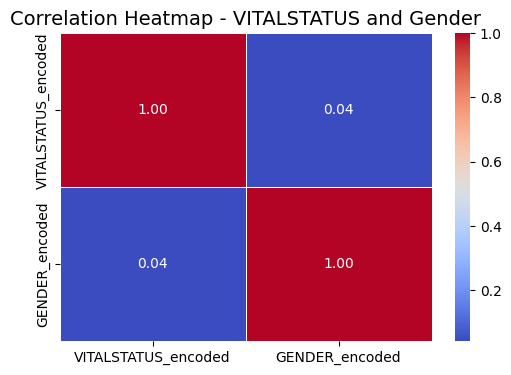

'VITALSTATUS-Gender correlation heatmap displayed.'

In [44]:
# Ensure 'VITALSTATUS' exists in the dataset before proceeding
if 'VITALSTATUS' in patient_df.columns:
    # Convert 'VITALSTATUS' to numeric if it is categorical
    patient_df['VITALSTATUS_encoded'] = patient_df['VITALSTATUS'].astype('category').cat.codes

    # Create a dataframe with VITALSTATUS and Gender for correlation analysis
    vital_gender_df = patient_df[['VITALSTATUS_encoded', 'GENDER_encoded']].dropna()

    # Plot correlation heatmap between VITALSTATUS and GENDER
    plt.figure(figsize=(6, 4))
    sns.heatmap(vital_gender_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap - VITALSTATUS and Gender", fontsize=14)
    plt.show()
else:
    heatmap_message = "VITALSTATUS column not found in the dataset."

# Return message if applicable
heatmap_message if 'VITALSTATUS' not in patient_df.columns else "VITALSTATUS-Gender correlation heatmap displayed."


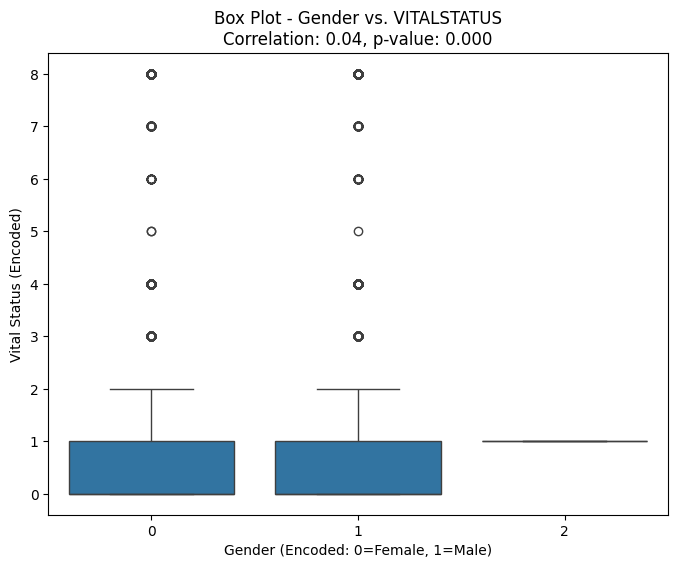

{'Correlation Coefficient': 0.041801896603499845,
 'P-Value': 0.0,
 'Interpretation': 'Significant relationship found'}

In [46]:
# Perform correlation analysis between GENDER and VITALSTATUS

# Ensure 'VITALSTATUS' and 'GENDER' exist before analysis
if 'VITALSTATUS' in patient_df.columns and 'GENDER_encoded' in patient_df.columns:
    # Convert VITALSTATUS to numeric encoding if categorical
    patient_df['VITALSTATUS_encoded'] = patient_df['VITALSTATUS'].astype('category').cat.codes

    # Drop missing values for analysis
    vital_gender_df = patient_df[['GENDER_encoded', 'VITALSTATUS_encoded']].dropna()

    # Compute correlation between Gender and VITALSTATUS
    correlation, p_value = stats.pearsonr(vital_gender_df['GENDER_encoded'], vital_gender_df['VITALSTATUS_encoded'])

    # Plot scatter plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=vital_gender_df['GENDER_encoded'], y=vital_gender_df['VITALSTATUS_encoded'])
    plt.xlabel("Gender (Encoded: 0=Female, 1=Male)")
    plt.ylabel("Vital Status (Encoded)")
    plt.title(f"Box Plot - Gender vs. VITALSTATUS\nCorrelation: {correlation:.2f}, p-value: {p_value:.3f}")
    plt.show()

    # Display correlation results
    gender_vital_analysis = {
        "Correlation Coefficient": correlation,
        "P-Value": p_value,
        "Interpretation": "Significant relationship found" if p_value < 0.05 else "No significant relationship"
    }
else:
    gender_vital_analysis = "VITALSTATUS column or GENDER column not found in the dataset."

# Return correlation analysis results
gender_vital_analysis
